In [239]:
%matplotlib inline

In [240]:
# Dependencies and Setup
import pandas as pd
import os

# File to Load (Remember to change the path if needed.)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read the School Data and Student Data and store into a Pandas DataFrame
school_data_df = pd.read_csv(school_data_to_load)
student_data_df = pd.read_csv(student_data_to_load)

# Cleaning Student Names and Replacing Substrings in a Python String
# Add each prefix and suffix to remove to a list.
prefixes_suffixes = ["Dr. ", "Mr. ","Ms. ", "Mrs. ", "Miss ", " MD", " DDS", " DVM", " PhD"]

# Iterate through the words in the "prefixes_suffixes" list and replace them with an empty space, "".
for word in prefixes_suffixes:
    student_data_df["student_name"] = student_data_df["student_name"].str.replace(word,"")

# Check names.
student_data_df.head(10)

C:\Users\brian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.


,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84
5,5,Bryan Miranda,M,9th,Huang High School,94,94
6,6,Sheena Carter,F,11th,Huang High School,82,80
7,7,Nicole Baker,F,12th,Huang High School,96,69
8,8,Michael Roth,M,10th,Huang High School,95,87
9,9,Matthew Greene,M,10th,Huang High School,96,84


## Deliverable 1: Replace the reading and math scores.

### Replace the 9th grade reading and math scores at Thomas High School with NaN.

In [241]:
# Install numpy using conda install numpy or pip install numpy. 
# Step 1. Import numpy as np.
import numpy as np

In [242]:
# Step 2. Use the loc method on the student_data_df to select all the reading scores from the 9th grade at Thomas High School and replace them with NaN.
#  Step 3. Refactor the code in Step 2 to replace the math scores with NaN.
# Get locations of 9th grade students from Thomas High School
locs=[]
for index, row in student_data_df.iterrows():
    school=row['school_name']
    grade=row['grade']
    if school=='Thomas High School' and grade=='9th':
        locs.append(index)
# use the "locs" list to replace reading and math scores
# reading is in column 5, math in 6
for x in locs:
    student_data_df.iloc[x,5]='NaN'
    student_data_df.iloc[x,6]='NaN'



In [243]:
#  Step 4. Check the student data for NaN's. 
# Display 9th grade students from Thomas High School and
# make sure their reading and math scores are NaN
# student_data_df.loc[(student_data_df['school_name'] == "Thomas High School") & (student_data_df['grade'] == "9th")]
student_data_df.tail(10)

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
39160,39160,Katie Weaver,F,11th,Thomas High School,89,86
39161,39161,April Reyes,F,10th,Thomas High School,70,84
39162,39162,Derek Weeks,M,12th,Thomas High School,94,77
39163,39163,John Reese,M,11th,Thomas High School,90,75
39164,39164,Joseph Anthony,M,9th,Thomas High School,NaN,NaN
39165,39165,Donna Howard,F,12th,Thomas High School,99,90
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70
39167,39167,Rebecca Tanner,F,9th,Thomas High School,NaN,NaN
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90
39169,39169,Carolyn Jackson,F,11th,Thomas High School,95,75


## Deliverable 2 : Repeat the school district analysis

### District Summary

In [244]:
# Combine the data into a single dataset
school_data_complete_df = pd.merge(student_data_df, school_data_df, how="left", on=["school_name", "school_name"])
school_data_complete_df.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [245]:
# Calculate the Totals (Schools and Students)
school_count = len(school_data_complete_df["school_name"].unique())
student_count = school_data_complete_df["Student ID"].count()

# Calculate the Total Budget
total_budget = school_data_df["budget"].sum()

In [246]:
# dtypes in school_data_complete_df are objects for reading and math scores
display(school_data_complete_df.dtypes)
# causes problems later when averages are calculated
# need to change these to float
# Need to change the data types of a few of the columns from "object" to "float" so we can do calculations with them later
school_data_complete_df[['reading_score','math_score']]=school_data_complete_df[['reading_score','math_score']].astype('float')
display(school_data_complete_df.dtypes)


Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score    object
math_score       object
School ID         int64
type             object
size              int64
budget            int64
dtype: object

Student ID         int64
student_name      object
gender            object
grade             object
school_name       object
reading_score    float64
math_score       float64
School ID          int64
type              object
size               int64
budget             int64
dtype: object

In [247]:
# Calculate the Average Scores using the "clean_student_data".
average_reading_score = school_data_complete_df["reading_score"].mean()
average_math_score = school_data_complete_df["math_score"].mean()

In [248]:
# Step 1. Get the number of students that are in ninth grade at Thomas High School.
# These students have no grades. 
no_grade_count=student_data_df.loc[(student_data_df['school_name'] == "Thomas High School") & (student_data_df['grade'] == "9th")]['Student ID'].count()

# Get the total student count 
student_count = school_data_complete_df["Student ID"].count()


# Step 2. Subtract the number of students that are in ninth grade at 
# Thomas High School from the total student count to get the new total student count.
new_student_count=student_count-no_grade_count

display([no_grade_count,student_count,new_student_count])


[461, 39170, 38709]

In [249]:
# Calculate the passing rates using the "clean_student_data".
passing_math_count = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)].count()["student_name"]
passing_reading_count = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)].count()["student_name"]

display([passing_math_count,passing_reading_count])

[28939, 33158]

In [250]:
# Step 3. Calculate the passing percentages with the new total student count.
passing_math_percentage=passing_math_count / new_student_count *100
passing_reading_percentage=passing_reading_count / new_student_count *100

display([passing_math_percentage,passing_reading_percentage])

[74.76039164018704, 85.6596657108166]

In [251]:
# Calculate the students who passed both reading and math.
passing_math_reading = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)
                                               & (school_data_complete_df["reading_score"] >= 70)]

# Calculate the number of students that passed both reading and math.
overall_passing_math_reading_count = passing_math_reading["student_name"].count()


# Step 4.Calculate the overall passing percentage with new total student count.
overall_passing_percentage=overall_passing_math_reading_count / new_student_count *100

display(overall_passing_percentage)


64.85571830840374

In [252]:
# Create a DataFrame
district_summary_df = pd.DataFrame(
          [{"Total Schools": school_count, 
          "Total Students": student_count, 
          "Total Budget": total_budget,
          "Average Math Score": average_math_score, 
          "Average Reading Score": average_reading_score,
          "% Passing Math": passing_math_percentage,
         "% Passing Reading": passing_reading_percentage,
        "% Overall Passing": overall_passing_percentage}])



# Format the "Total Students" to have the comma for a thousands separator.
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
# Format the "Total Budget" to have the comma for a thousands separator, a decimal separator and a "$".
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)
# Format the columns.
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].map("{:.1f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].map("{:.1f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].map("{:.1f}".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].map("{:.1f}".format)
district_summary_df["% Overall Passing"] = district_summary_df["% Overall Passing"].map("{:.1f}".format)

# Display the data frame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.9,81.9,74.8,85.7,64.9


##  School Summary

In [253]:
# Determine the School Type
per_school_types = school_data_df.set_index(["school_name"])["type"]

# Calculate the total student count.
per_school_counts = school_data_complete_df["school_name"].value_counts()

# Calculate the total school budget and per capita spending
per_school_budget = school_data_complete_df.groupby(["school_name"]).mean()["budget"]
# Calculate the per capita spending.
per_school_capita = per_school_budget / per_school_counts

# Calculate the average test scores.
per_school_math = school_data_complete_df.groupby(["school_name"]).mean()["math_score"]
per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

# Calculate the passing scores by creating a filtered DataFrame.
per_school_passing_math = school_data_complete_df[(school_data_complete_df["math_score"] >= 70)]
per_school_passing_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)]

# Calculate the number of students passing math and passing reading by school.
per_school_passing_math = per_school_passing_math.groupby(["school_name"]).count()["student_name"]
per_school_passing_reading = per_school_passing_reading.groupby(["school_name"]).count()["student_name"]

# Calculate the percentage of passing math and reading scores per school.
per_school_passing_math = per_school_passing_math / per_school_counts * 100
per_school_passing_reading = per_school_passing_reading / per_school_counts * 100

# Calculate the students who passed both reading and math.
per_passing_math_reading = school_data_complete_df[(school_data_complete_df["reading_score"] >= 70)
                                               & (school_data_complete_df["math_score"] >= 70)]

# Calculate the number of students passing math and passing reading by school.
per_passing_math_reading = per_passing_math_reading.groupby(["school_name"]).count()["student_name"]

# Calculate the percentage of passing math and reading scores per school.
per_overall_passing_percentage = per_passing_math_reading / per_school_counts * 100

In [254]:
# Create the DataFrame
per_school_summary_df = pd.DataFrame({
    "School Type": per_school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_school_capita,
    "Average Math Score": per_school_math,
    "Average Reading Score": per_school_reading,
    "% Passing Math": per_school_passing_math,
    "% Passing Reading": per_school_passing_reading,
    "% Overall Passing": per_overall_passing_percentage})


per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,90.599455


In [255]:
# Format the Total School Budget and the Per Student Budget
per_school_summary_df["Total School Budget"] = per_school_summary_df["Total School Budget"].map("${:,.2f}".format)
per_school_summary_df["Per Student Budget"] = per_school_summary_df["Per Student Budget"].map("${:,.2f}".format)

# Display the data frame
per_school_summary_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


In [256]:
# Step 5.  Get the number of 10th-12th graders from Thomas High School (THS).
# Use the 'not' operator "!=", select all Thomas High School students that are not 9th graders
thomas_count=school_data_complete_df[(school_data_complete_df['school_name'] == "Thomas High School") & (school_data_complete_df['grade'] != "9th")]['Student ID'].count()
thomas_count

1174

In [257]:
# Step 6. Get all the students passing math from THS
thomas_passing_math=school_data_complete_df.loc[(school_data_complete_df['school_name'] == "Thomas High School") & (school_data_complete_df['math_score'] >= 70)]
# Step 7. Get all the students passing reading from THS
thomas_passing_reading=school_data_complete_df.loc[(school_data_complete_df['school_name'] == "Thomas High School") & (school_data_complete_df['reading_score'] >= 70)]

display(thomas_passing_math.head())
display(thomas_passing_reading.head())

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
37535,37535,Norma Mata,F,10th,Thomas High School,76.0,76.0,14,Charter,1635,1043130
37536,37536,Cody Miller,M,11th,Thomas High School,84.0,82.0,14,Charter,1635,1043130
37541,37541,Eric Stevens,M,10th,Thomas High School,80.0,76.0,14,Charter,1635,1043130
37542,37542,Elizabeth Bennett,F,11th,Thomas High School,91.0,94.0,14,Charter,1635,1043130
37544,37544,Jacqueline Harris,F,10th,Thomas High School,71.0,92.0,14,Charter,1635,1043130


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
37535,37535,Norma Mata,F,10th,Thomas High School,76.0,76.0,14,Charter,1635,1043130
37536,37536,Cody Miller,M,11th,Thomas High School,84.0,82.0,14,Charter,1635,1043130
37541,37541,Eric Stevens,M,10th,Thomas High School,80.0,76.0,14,Charter,1635,1043130
37542,37542,Elizabeth Bennett,F,11th,Thomas High School,91.0,94.0,14,Charter,1635,1043130
37544,37544,Jacqueline Harris,F,10th,Thomas High School,71.0,92.0,14,Charter,1635,1043130


In [258]:
# Step 8. Get all the students passing math and reading from THS
thomas_passing_math_reading=school_data_complete_df.loc[(school_data_complete_df['school_name'] ==      "Thomas High School") & (school_data_complete_df['math_score'] >= 70) & (school_data_complete_df['reading_score'] >= 70)]
thomas_passing_math_reading.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
37535,37535,Norma Mata,F,10th,Thomas High School,76.0,76.0,14,Charter,1635,1043130
37536,37536,Cody Miller,M,11th,Thomas High School,84.0,82.0,14,Charter,1635,1043130
37541,37541,Eric Stevens,M,10th,Thomas High School,80.0,76.0,14,Charter,1635,1043130
37542,37542,Elizabeth Bennett,F,11th,Thomas High School,91.0,94.0,14,Charter,1635,1043130
37544,37544,Jacqueline Harris,F,10th,Thomas High School,71.0,92.0,14,Charter,1635,1043130


In [259]:
# Step 9. Calculate the percentage of 10th-12th grade students passing math from Thomas High School. 
thomas_passing_math_count=thomas_passing_math['Student ID'].count()
thomas_passing_math_percent=thomas_passing_math_count / thomas_count *100
# Step 10. Calculate the percentage of 10th-12th grade students passing reading from Thomas High School.
thomas_passing_reading_count=thomas_passing_reading['Student ID'].count()
thomas_passing_reading_percent=thomas_passing_reading_count / thomas_count *100
# Step 11. Calculate the overall passing percentage of 10th-12th grade from Thomas High School. 
thomas_passing_math_reading_count=thomas_passing_math_reading['Student ID'].count()
thomas_passing_math_reading_percent=thomas_passing_math_reading_count / thomas_count *100

display([thomas_passing_math_percent,thomas_passing_reading_percent,thomas_passing_math_reading_percent])

[93.18568994889267, 97.01873935264055, 90.63032367972743]

In [260]:
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455


In [261]:
# Step 12. Replace the passing math percent for Thomas High School in the per_school_summary_df.
per_school_summary_df.loc['Thomas High School','% Passing Math']=thomas_passing_math_percent
# Step 13. Replace the passing reading percentage for Thomas High School in the per_school_summary_df.
per_school_summary_df.loc['Thomas High School','% Passing Reading']=thomas_passing_reading_percent
# Step 14. Replace the overall passing percentage for Thomas High School in the per_school_summary_df.
per_school_summary_df.loc['Thomas High School','% Overall Passing']=thomas_passing_math_reading_percent


display([thomas_passing_math_percent,thomas_passing_reading_percent,thomas_passing_math_reading_percent])
display(per_school_summary_df.loc['Thomas High School'])




[93.18568994889267, 97.01873935264055, 90.63032367972743]

School Type                    Charter
Total Students                    1635
Total School Budget      $1,043,130.00
Per Student Budget             $638.00
Average Math Score           83.350937
Average Reading Score        83.896082
% Passing Math                93.18569
% Passing Reading            97.018739
% Overall Passing            90.630324
Name: Thomas High School, dtype: object

## High and Low Performing Schools 

In [262]:
# Sort and show top five and bottom five schools.
top_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=False)
bottom_schools = per_school_summary_df.sort_values(["% Overall Passing"], ascending=True)

display(top_schools.head(5))
display(bottom_schools.head(5))

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.350937,83.896082,93.185690,97.018739,90.630324
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math and Reading Scores by Grade

In [263]:
# Create a Series of scores by grade levels using conditionals.
# Grade-Level Data Frames
ninth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "9th")]
tenth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "10th")]
eleventh_graders = school_data_complete_df[(school_data_complete_df["grade"] == "11th")]
twelfth_graders = school_data_complete_df[(school_data_complete_df["grade"] == "12th")]

# Group each school Series by the school name for the average math score.
# Group each school Series by the school name for the average reading score.
ninth_grade_math_scores = ninth_graders.groupby(["school_name"]).mean()["math_score"]
tenth_grade_math_scores = tenth_graders.groupby(["school_name"]).mean()["math_score"]
eleventh_grade_math_scores = eleventh_graders.groupby(["school_name"]).mean()["math_score"]
twelfth_grade_math_scores = twelfth_graders.groupby(["school_name"]).mean()["math_score"]

ninth_grade_reading_scores = ninth_graders.groupby(["school_name"]).mean()["reading_score"]
tenth_grade_reading_scores = tenth_graders.groupby(["school_name"]).mean()["reading_score"]
eleventh_grade_reading_scores = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]
twelfth_grade_reading_scores = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]


In [264]:
# Combine each Series for average math scores by school into single data frame.
math_scores_by_grade=pd.DataFrame({
    "9th":ninth_grade_math_scores,
    "10th":tenth_grade_math_scores,
    "11th":eleventh_grade_math_scores,
    "12th":twelfth_grade_math_scores
})

# Combine each Series for average reading scores by school into single data frame.
reading_scores_by_grade=pd.DataFrame({
    "9th":ninth_grade_reading_scores,
    "10th":tenth_grade_reading_scores,
    "11th":eleventh_grade_reading_scores,
    "12th":twelfth_grade_reading_scores
})

# Format the grades
# First, create a list of grades, then use in loop
grades=["9th","10th","11th","12th"]
for grade in grades:
    math_scores_by_grade[grade]=math_scores_by_grade[grade].map("{:.1f}".format)
    reading_scores_by_grade[grade]=reading_scores_by_grade[grade].map("{:.1f}".format)

display(math_scores_by_grade)
display(reading_scores_by_grade)

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9


,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2


In [265]:
## Remove the index.
math_scores_by_grade.index.name = None
reading_scores_by_grade.index.name = None


# Display the data frame
display(math_scores_by_grade)
display(reading_scores_by_grade)

,9th,10th,11th,12th
Bailey High School,77.1,77.0,77.5,76.5
Cabrera High School,83.1,83.2,82.8,83.3
Figueroa High School,76.4,76.5,76.9,77.2
Ford High School,77.4,77.7,76.9,76.2
Griffin High School,82.0,84.2,83.8,83.4
Hernandez High School,77.4,77.3,77.1,77.2
Holden High School,83.8,83.4,85.0,82.9
Huang High School,77.0,75.9,76.4,77.2
Johnson High School,77.2,76.7,77.5,76.9
Pena High School,83.6,83.4,84.3,84.1


,9th,10th,11th,12th
Bailey High School,81.3,80.9,80.9,80.9
Cabrera High School,83.7,84.3,83.8,84.3
Figueroa High School,81.2,81.4,80.6,81.4
Ford High School,80.6,81.3,80.4,80.7
Griffin High School,83.4,83.7,84.3,84.0
Hernandez High School,80.9,80.7,81.4,80.9
Holden High School,83.7,83.3,83.8,84.7
Huang High School,81.3,81.5,81.4,80.3
Johnson High School,81.3,80.8,80.6,81.2
Pena High School,83.8,83.6,84.3,84.6


## Scores by School Spending

In [266]:
# Establish the spending bins and group names.
spending_bins = [0, 585, 630, 645, 675]
group_names = ["<$584", "$585-629", "$630-644", "$645-675"]

# Categorize spending based on the bins.
per_school_summary_df["Spending Ranges (Per Student)"] = pd.cut(per_school_capita, spending_bins, labels=group_names)
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629


In [267]:
# Calculate averages for the desired columns. 
spending_math_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Math Score"]
spending_reading_scores = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["Average Reading Score"]
spending_passing_math = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Math"]
spending_passing_reading = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Passing Reading"]
overall_passing_spending = per_school_summary_df.groupby(["Spending Ranges (Per Student)"]).mean()["% Overall Passing"]

In [268]:
# Create the DataFrame
spending_summary_df = pd.DataFrame({
          "Average Math Score" : spending_math_scores,
          "Average Reading Score": spending_reading_scores,
          "% Passing Math": spending_passing_math,
          "% Passing Reading": spending_passing_reading,
          "% Overall Passing": overall_passing_spending})

spending_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.455399,83.933814,93.460096,96.610877,90.369459
$585-629,81.899826,83.155286,87.133538,92.718205,81.418596
$630-644,78.502002,81.636261,73.462589,84.319261,62.778233
$645-675,76.997210,81.027843,66.164813,81.133951,53.526855


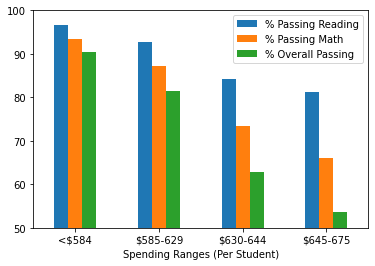

In [269]:
# The more you spend, the lower the percent passing
ylim=(50, 100)
yticks=(50,60,70,80,90,100)
spending_passing_plot=spending_summary_df.plot(y=['% Passing Reading','% Passing Math','% Overall Passing'],kind='bar',ylim=ylim,yticks=yticks,rot=0)

In [270]:
# Format the DataFrame
# make a new data frame since this changes the dtypes and we may want to still use this for calculations
spending_summary_df2=spending_summary_df
for label in spending_summary_df.columns:
    spending_summary_df2[label]=spending_summary_df2[label].map("{:.1f}".format)

spending_summary_df2

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<$584,83.5,83.9,93.5,96.6,90.4
$585-629,81.9,83.2,87.1,92.7,81.4
$630-644,78.5,81.6,73.5,84.3,62.8
$645-675,77.0,81.0,66.2,81.1,53.5


## Scores by School Size

In [271]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

# Categorize spending based on the bins.
per_school_summary_df["School Size"] = pd.cut(per_school_summary_df["Total Students"], size_bins, labels=group_names)
per_school_summary_df.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student),School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-629,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$584,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-644,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-644,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-629,Medium (1000-2000)


In [272]:
# Calculate averages for the desired columns. 
# Calculate averages for the desired columns.
size_math_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Math Score"]
size_reading_scores = per_school_summary_df.groupby(["School Size"]).mean()["Average Reading Score"]
size_passing_math = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Math"]
size_passing_reading = per_school_summary_df.groupby(["School Size"]).mean()["% Passing Reading"]
size_overall_passing = per_school_summary_df.groupby(["School Size"]).mean()["% Overall Passing"]

# Assemble into DataFrame.
size_summary_df = pd.DataFrame({
          "Average Math Score" : size_math_scores,
          "Average Reading Score": size_reading_scores,
          "% Passing Math": size_passing_math,
          "% Passing Reading": size_passing_reading,
          "% Overall Passing": size_overall_passing})

size_summary_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.361201,83.873869,93.582398,96.732654,90.557997
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


In [273]:
# Format the DataFrame  
# make a new data frame since this changes the dtypes and we may want to still use this for calculations
size_summary_df2=size_summary_df
for label in size_summary_df.columns:
    size_summary_df2[label]=size_summary_df2[label].map("{:.1f}".format)

size_summary_df2

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.8,83.9,93.6,96.1,89.9
Medium (1000-2000),83.4,83.9,93.6,96.7,90.6
Large (2000-5000),77.7,81.3,70.0,82.8,58.3


## Scores by School Type

In [274]:
# Calculate averages for the desired columns.
type_math_scores=school_data_complete_df.groupby(['type']).mean()['math_score']
type_reading_scores=school_data_complete_df.groupby(['type']).mean()['reading_score']

# Assemble into DataFrame. 
type_scores_df=pd.DataFrame({
          "Average Math Score" : type_math_scores,
          "Average Reading Score": type_reading_scores
          })

# Format the DataFrame 
for label in type_scores_df.columns:
    type_scores_df[label]=type_scores_df[label].map("{:.1f}".format)

# Remove the index
type_scores_df.index.name = None

type_scores_df


,Average Math Score,Average Reading Score
Charter,83.4,83.9
District,77.0,81.0
